In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

df = pd.read_csv("processed.cleveland.data", names=col_names, header=None, na_values="?")

df.head()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


In [4]:
df.diagnosis.value_counts()                                         
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0            72
     1             9
     2             7
     3             7
     4             2
1.0  0            92
     1            46
     2            29
     3            28
     4            11
Name: diagnosis, dtype: int64

In [5]:
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

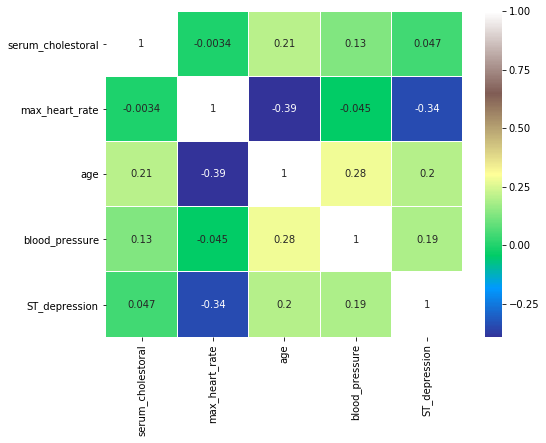

In [6]:
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [7]:
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

In [8]:
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


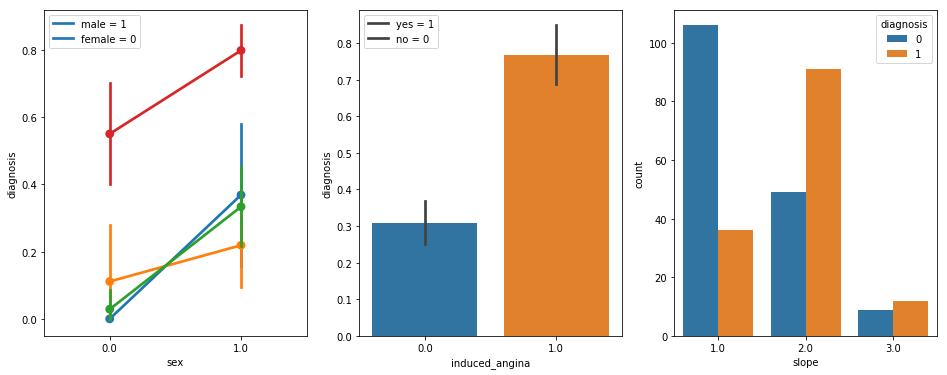

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()

In [10]:
df[['blood_pressure','diagnosis']].groupby('diagnosis').mean()

,blood_pressure
diagnosis,
0,129.250000
1,134.568345


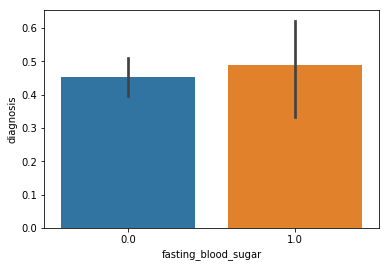

In [11]:
sns.barplot(x="fasting_blood_sugar", y="diagnosis", data=df)

In [12]:
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

In [13]:
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [14]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
y_test.values

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0])

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    model = classifier(**kwargs)
    
    model.fit(X_train,y_train)
    
    pred_x = model.predict(X_test)
    plt.plot(pred_x)
    plt.plot(y_test.values)
    
    cnf_matrix = confusion_matrix(y_test, pred_x)
    np.set_printoptions(precision=2)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Heart disease", "No heart disease"],
                          title='Confusion matrix')
    plt.show()
    
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test,y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

Confusion matrix, without normalization
[[47  5]
 [ 7 32]]


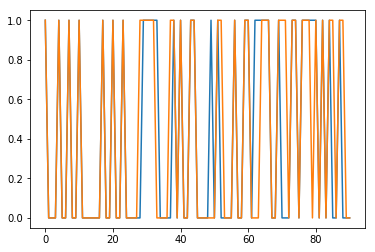

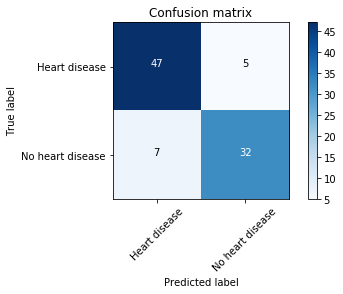

Train accuracy: 88.21%
Test accuracy: 86.81%


In [20]:
#KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

n_neigbors = 1
Confusion matrix, without normalization
[[41 11]
 [12 27]]


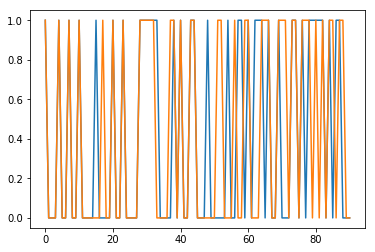

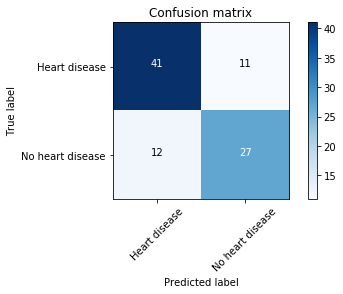

Train accuracy: 100.00%
Test accuracy: 74.73%
n_neigbors = 2
Confusion matrix, without normalization
[[48  4]
 [15 24]]


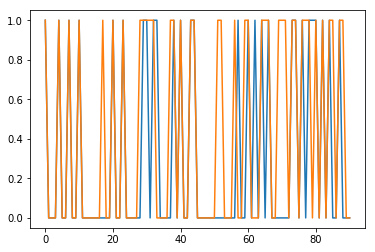

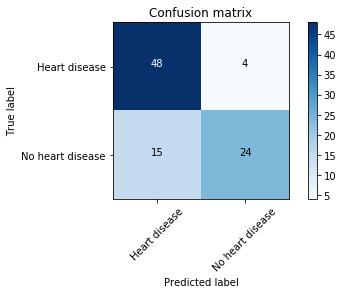

Train accuracy: 87.74%
Test accuracy: 79.12%
n_neigbors = 3
Confusion matrix, without normalization
[[44  8]
 [ 7 32]]


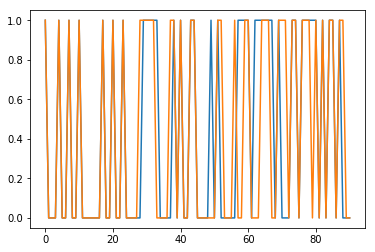

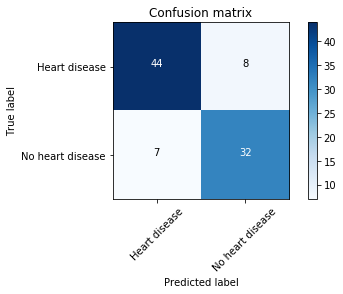

Train accuracy: 90.57%
Test accuracy: 83.52%
n_neigbors = 4
Confusion matrix, without normalization
[[48  4]
 [10 29]]


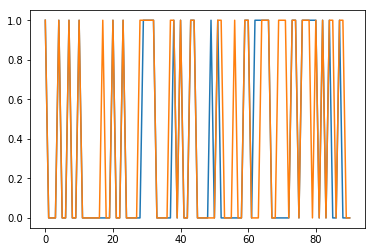

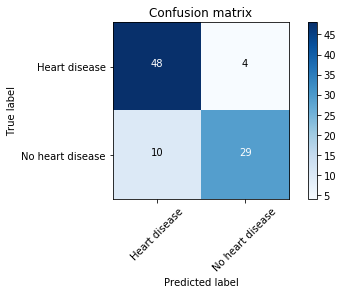

Train accuracy: 87.74%
Test accuracy: 84.62%
n_neigbors = 5
Confusion matrix, without normalization
[[47  5]
 [ 7 32]]


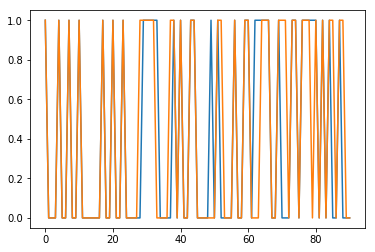

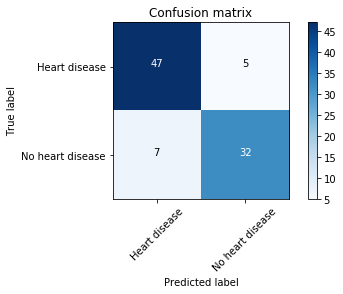

Train accuracy: 88.21%
Test accuracy: 86.81%
n_neigbors = 6
Confusion matrix, without normalization
[[48  4]
 [ 8 31]]


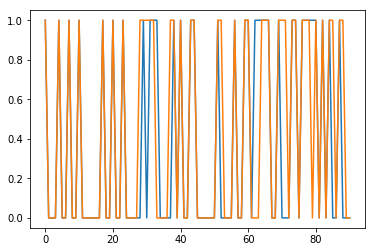

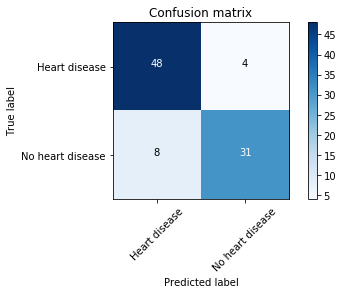

Train accuracy: 85.38%
Test accuracy: 86.81%
n_neigbors = 7
Confusion matrix, without normalization
[[47  5]
 [ 7 32]]


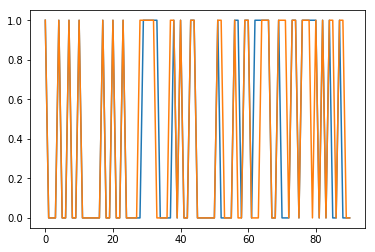

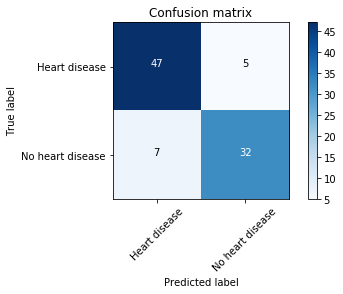

Train accuracy: 87.26%
Test accuracy: 86.81%
n_neigbors = 8
Confusion matrix, without normalization
[[47  5]
 [ 8 31]]


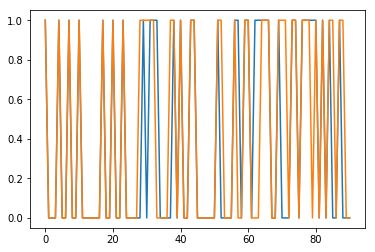

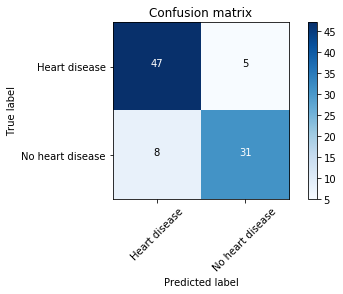

Train accuracy: 85.38%
Test accuracy: 85.71%
n_neigbors = 9
Confusion matrix, without normalization
[[46  6]
 [ 7 32]]


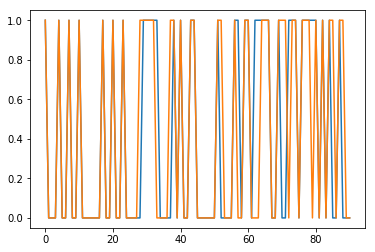

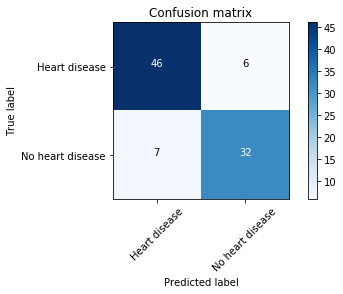

Train accuracy: 86.32%
Test accuracy: 85.71%


In [21]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

Confusion matrix, without normalization
[[42 10]
 [12 27]]


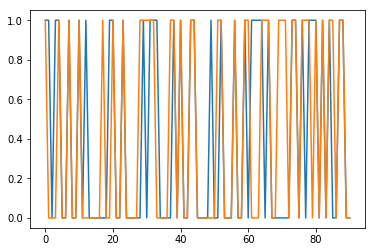

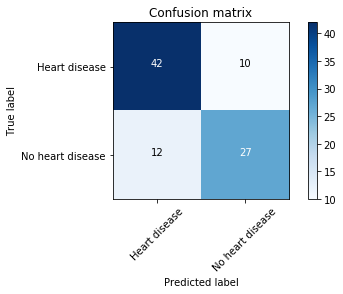

Train accuracy: 100.00%
Test accuracy: 75.82%


In [22]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)

max_depth = 1
Confusion matrix, without normalization
[[41 11]
 [12 27]]


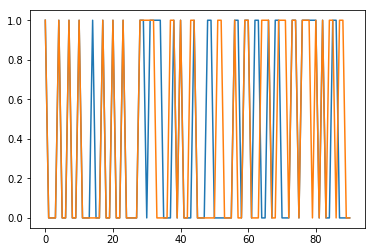

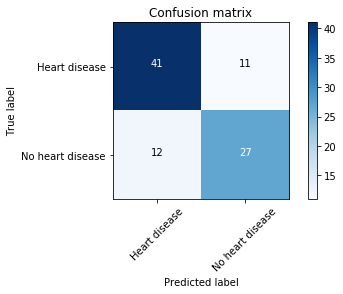

Train accuracy: 76.89%
Test accuracy: 74.73%
max_depth = 2
Confusion matrix, without normalization
[[46  6]
 [19 20]]


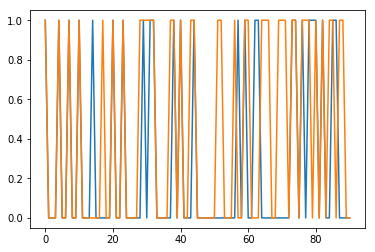

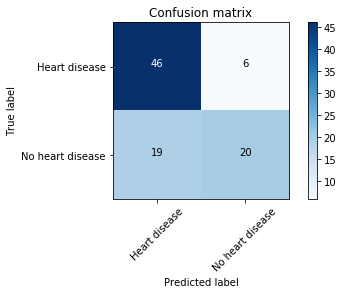

Train accuracy: 78.30%
Test accuracy: 72.53%
max_depth = 3
Confusion matrix, without normalization
[[44  8]
 [13 26]]


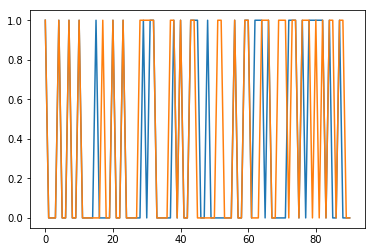

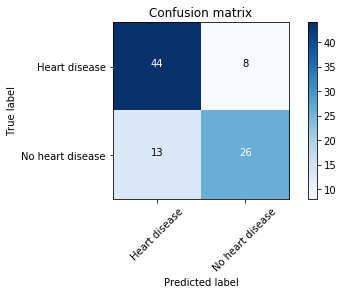

Train accuracy: 87.74%
Test accuracy: 76.92%
max_depth = 4
Confusion matrix, without normalization
[[44  8]
 [12 27]]


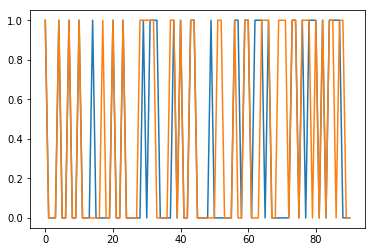

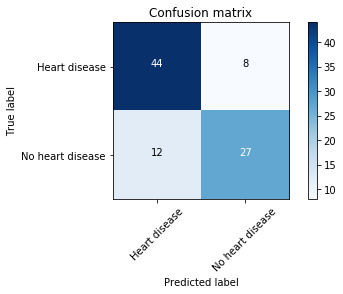

Train accuracy: 91.98%
Test accuracy: 78.02%
max_depth = 5
Confusion matrix, without normalization
[[46  6]
 [14 25]]


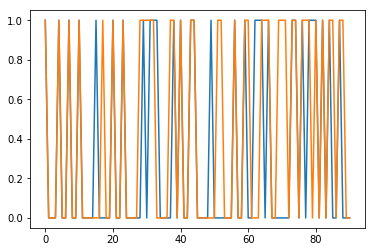

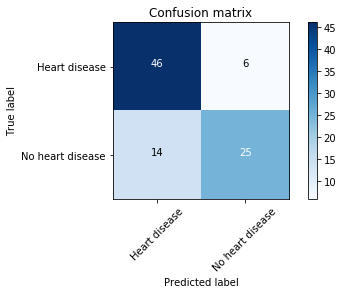

Train accuracy: 94.81%
Test accuracy: 78.02%
max_depth = 6
Confusion matrix, without normalization
[[47  5]
 [14 25]]


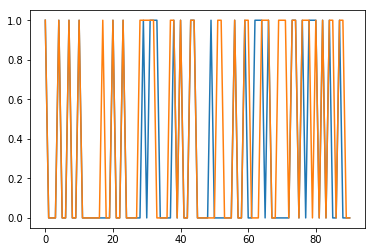

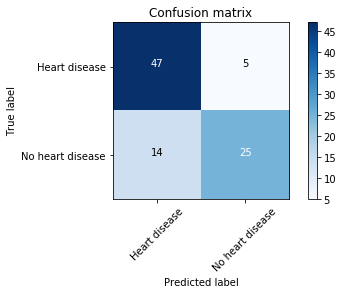

Train accuracy: 97.17%
Test accuracy: 79.12%
max_depth = 7
Confusion matrix, without normalization
[[43  9]
 [13 26]]


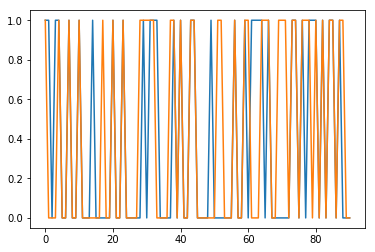

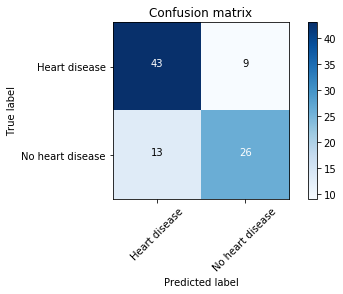

Train accuracy: 97.64%
Test accuracy: 75.82%


In [23]:
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

Confusion matrix, without normalization
[[47  5]
 [ 8 31]]


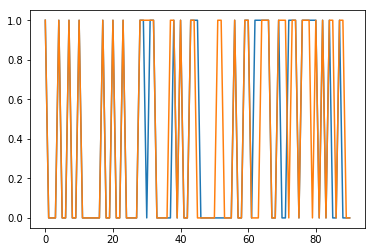

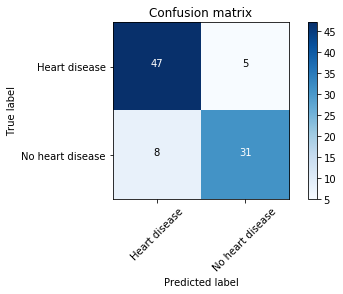

Train accuracy: 85.85%
Test accuracy: 85.71%


In [24]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Confusion matrix, without normalization
[[47  5]
 [ 7 32]]


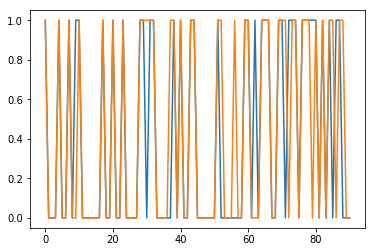

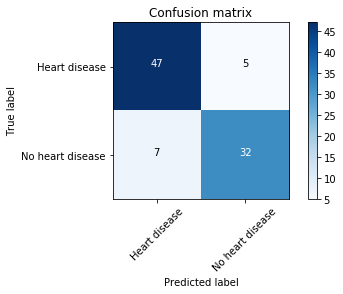

Train accuracy: 85.38%
Test accuracy: 86.81%


In [25]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Confusion matrix, without normalization
[[48  4]
 [ 7 32]]


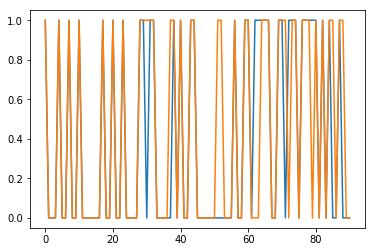

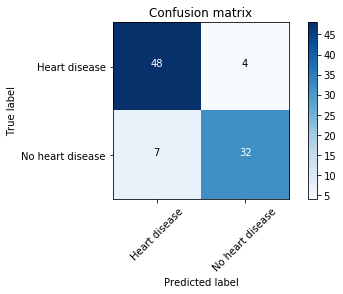

Train accuracy: 84.91%
Test accuracy: 87.91%


In [26]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Confusion matrix, without normalization
[[48  4]
 [ 6 33]]


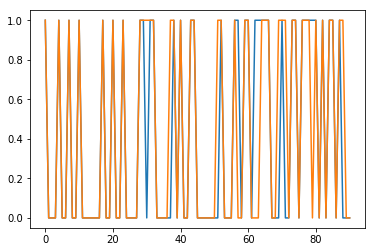

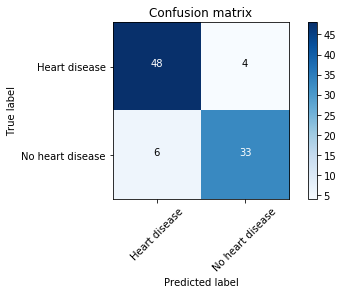

Train accuracy: 100.00%
Test accuracy: 89.01%


In [27]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

In [28]:
accuracy = []

classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [29]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.868132
Decision Trees,0.791209
Logistic Regression,0.857143
Naive Bayes,0.868132
SVM,0.879121
Random Forests,0.890110
